In [1]:
%matplotlib inline

In [2]:
import logging
import numpy as np

In [3]:
%run utils/data.py
%run config.py

In [4]:
logging.basicConfig(
    level=logging.INFO, format="%(asctime)s : %(levelname)s : %(module)s : %(message)s", datefmt="%d-%m-%Y %H:%M:%S"
)

In [5]:
grid_sizes = load_grid_sizes(GRID_SIZES_FILENAME)
polygons = load_polygons(POLYGONS_FILENAME)

all_images = sorted(set(grid_sizes.index))
train_images = sorted(set(polygons.index))
test_images = sorted(set(all_images) - set(train_images))
logging.info('Train: %s, Test: %s, All: %s', len(train_images), len(test_images), len(all_images))

18-02-2017 13:35:12 : INFO : data : Grid sizes: (450, 2)
18-02-2017 13:35:13 : INFO : data : Polygons: (250, 2)
18-02-2017 13:35:13 : INFO : <ipython-input-5-eb42f286861b> : Train: 25, Test: 425, All: 450


In [6]:
img_id = train_images[0]
logging.info('Image id: %s', img_id)

18-02-2017 13:35:13 : INFO : <ipython-input-6-0bde21e5ad24> : Image id: 6010_1_2


In [7]:
img_rgb = load_image(os.path.join(IMAGES_THREE_BAND_DIR, '{}.tif'.format(img_id)))
img_m = load_image(os.path.join(IMAGES_SIXTEEN_BAND_DIR, '{}_M.tif'.format(img_id)))
img_a = load_image(os.path.join(IMAGES_SIXTEEN_BAND_DIR, '{}_A.tif'.format(img_id)))
img_pan = load_image(os.path.join(IMAGES_SIXTEEN_BAND_DIR, '{}_P.tif'.format(img_id)))
logging.info('RGB: %s, M: %s, A: %s, Pan: %s', img_rgb.shape, img_m.shape, img_a.shape, img_pan.shape)

18-02-2017 13:35:13 : INFO : <ipython-input-7-1f45cf1a46a0> : RGB: (3349, 3396, 3), M: (837, 849, 8), A: (134, 136, 8), Pan: (3348, 3396, 1)


In [9]:
img_rgbn_scaled, img_rgbn_sharpened, _ = pansharpen(img_m, img_pan, W=0.3, all_data=True)
logging.info('Scaled: %s, Sharpened: %s', img_rgbn_scaled.shape, img_rgbn_sharpened.shape)

18-02-2017 13:35:17 : INFO : <ipython-input-9-4dc762d3de0a> : Scaled: (3348, 3396, 4), Sharpened: (3348, 3396, 4)


(<matplotlib.figure.Figure at 0x7f147a90e470>,
 <matplotlib.image.AxesImage at 0x7f1477fa8e48>)

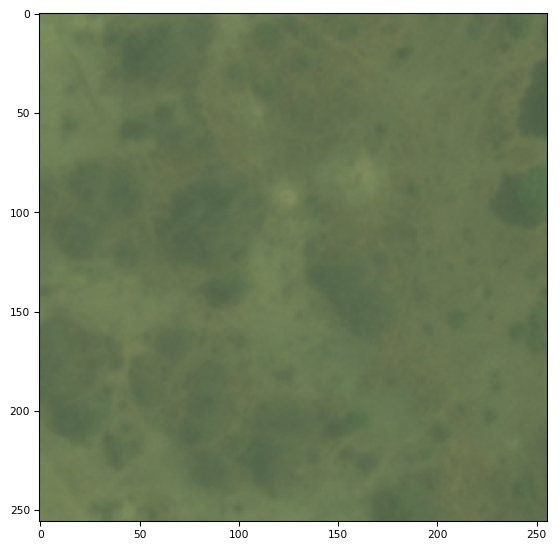

In [8]:
tiff.imshow(img_rgb[:256,:256,:])

(<matplotlib.figure.Figure at 0x7f1477f8ea58>,
 <matplotlib.image.AxesImage at 0x7f1477f18400>)

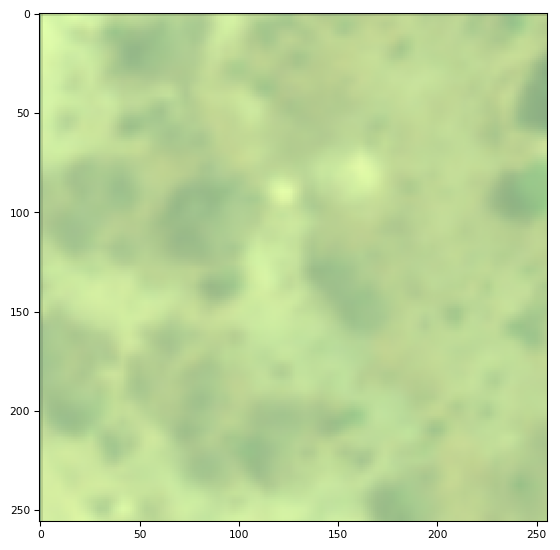

In [10]:
tiff.imshow(img_rgbn_scaled[:256,:256,:3])

(<matplotlib.figure.Figure at 0x7f1477ee9240>,
 <matplotlib.image.AxesImage at 0x7f1477e7bfd0>)

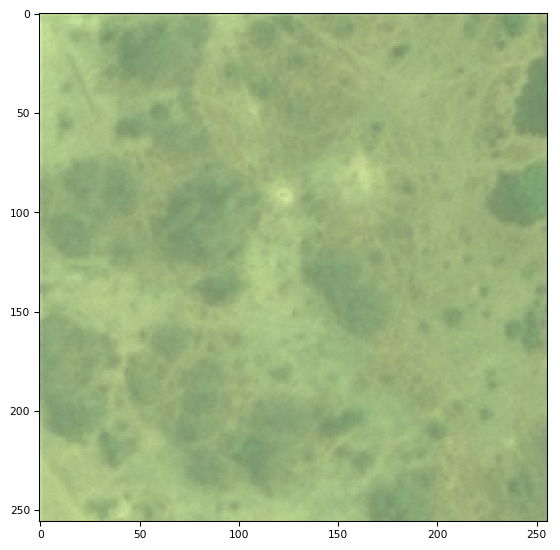

In [11]:
tiff.imshow(img_rgbn_sharpened[:256,:256,:3])